# Import libraries and data

In [55]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from pmdarima.arima import auto_arima
import statsmodels.api as sm

# Cleaning Data

In [56]:
data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
data = data[:3000]

In [57]:
data.dropna(subset=['DATE_TIME'], inplace=True)
data.drop(columns=['PLANT_ID','SOURCE_KEY'], inplace=True)

In [58]:
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])
data.set_index('DATE_TIME', inplace=True)

In [59]:
data.interpolate(method='time', inplace=True)
data.fillna(method='bfill', inplace=True) # Time based interpolation misses the first few NA. Using backward filling fixes this

# Time Series Analysis

In [60]:
y = data['IRRADIATION']
X = data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]
exog_vars = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']
stl = sm.tsa.seasonal_decompose(data['IRRADIATION'],period=96)
trend = stl.trend

In [61]:
trend.interpolate(method='time', inplace=True)
trend.fillna(method='bfill', inplace=True) # Time based interpolation misses the first few NA. Using backward filling fixes this

In [62]:
model = auto_arima(y=trend, exogenous=X, seasonal=True,
                   stepwise=True, trace=True )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-35278.126, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-28898.667, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-34268.173, Time=0.99 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-28896.670, Time=2.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-28900.569, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-35338.125, Time=1.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-31168.888, Time=1.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-34899.370, Time=1.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-35361.317, Time=1.94 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-33565.029, Time=3.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-35357.135, Time=2.44 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-35406.100, Time=3.75 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-33713.216, Time=3.30 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-35480.446, Time=4.15 sec
 ARIM

In [63]:
test_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv').drop(columns=['PLANT_ID','SOURCE_KEY','IRRADIATION'])

In [64]:
test_data['DATE_TIME'] = pd.to_datetime(test_data['DATE_TIME'])
test_data.set_index('DATE_TIME', inplace=True)
X = test_data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]

In [65]:
forecast =pd.DataFrame(model.predict(n_periods=len(X),X = X))

c:\Users\Vishal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

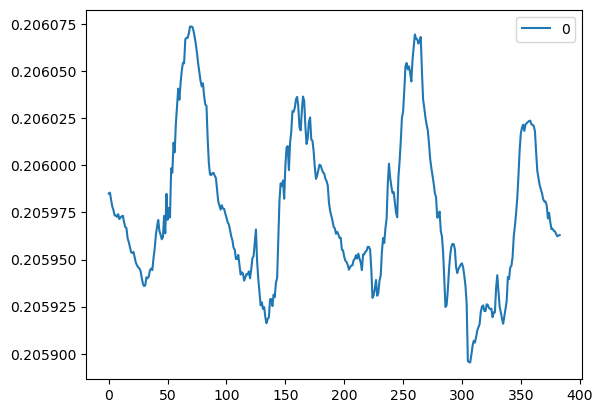

In [68]:
forecast[:96*4].plot() 